###  Spectral analysis of sputnik's audio 



In [1]:
## Audio file

import IPython
IPython.display.Audio(r"C:\Users\vishu\UNI_siegen python_prog\Sputnik\MP3_sputnik-beep.mp3")

In [2]:
# Importing Libraries

%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import seaborn as sns

from scipy.fft import fft, ifft, rfft, rfftfreq
from scipy import signal
from scipy import ndimage

import emd
from pydub import AudioSegment


In [3]:
# Figure settings

sns.set(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [4]:
pip show pydub                         # checking pydub package

Name: pydub
Version: 0.25.1
Summary: Manipulate audio with an simple and easy high level interface
Home-page: http://pydub.com
Author: James Robert
Author-email: jiaaro@gmail.com
License: MIT
Location: c:\users\vishu\anaconda3\lib\site-packages
Requires: 
Required-by: 
---
Name: pydub
Version: 0.25.1
Summary: Manipulate audio with an simple and easy high level interface
Home-page: http://pydub.com
Author: James Robert
Author-email: jiaaro@gmail.com
License: MIT
Location: c:\users\vishu\anaconda3\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show ffmpeg-python               # checking ffmpeg software (pydub requires ffmpeg)

Name: ffmpeg-python
Version: 0.2.0
Summary: Python bindings for FFmpeg - with complex filtering support
Home-page: https://github.com/kkroening/ffmpeg-python
Author: Karl Kroening
Author-email: karlk@kralnet.us
License: UNKNOWN
Location: c:\users\vishu\anaconda3\lib\site-packages
Requires: future
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
pwd

'C:\\Users\\vishu\\UNI_siegen python_prog\\Sputnik'

In [7]:
# Function to load an MP3 file and converting it into a NumPy array


def mp3_to_np_array(file_path):
    
    # Load the MP3 file
    audio = AudioSegment.from_file(file_path, format="mp3")

    # Extract the raw audio data as a NumPy array
    audio_array = np.array(audio.get_array_of_samples())

    return audio_array

# Specify the path to your MP3 file
mp3_file_path = r"C:\Users\vishu\UNI_siegen python_prog\Sputnik\MP3_sputnik-beep.mp3"


# other possible ways of providing file path  ----> raw string
# r'C:\Users\vishu\UNI_siegen python_prog\Sputnik\sputnik-beep.mp3'  


# Call the function to convert the MP3 file to a NumPy array
audio_np_array = mp3_to_np_array(mp3_file_path)

# Display the shape of the NumPy array
print("Shape of the NumPy array:", audio_np_array.shape)


Shape of the NumPy array: (421632,)


In [8]:
# Signal Properties

fs = 48000                              # Sampling frequency
N = 421632                              # Number of data points
T = 1/fs                                # Sampling period (one sample at every 8 seconds)
t = np.arange(N) / float(fs)            # Time vector 

r=2*np.pi

In [9]:
np.shape(t)                             # Time vector shape

(421632,)

In [10]:
# Signal construction

x1 = audio_np_array

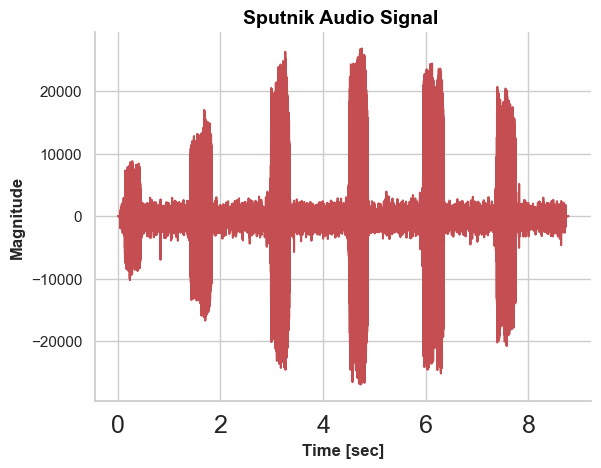

In [11]:
#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x1, 'r')

plt.title('Sputnik Audio Signal ', fontsize=14, fontweight='bold', color='black')

plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(fontsize=18, rotation=0)

#plt.subplot(211)
#plt.plot(Noise)


sns.despine()
rcParams['axes.linewidth'] = 1
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("Sputnik1_01_TD01_Beat.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

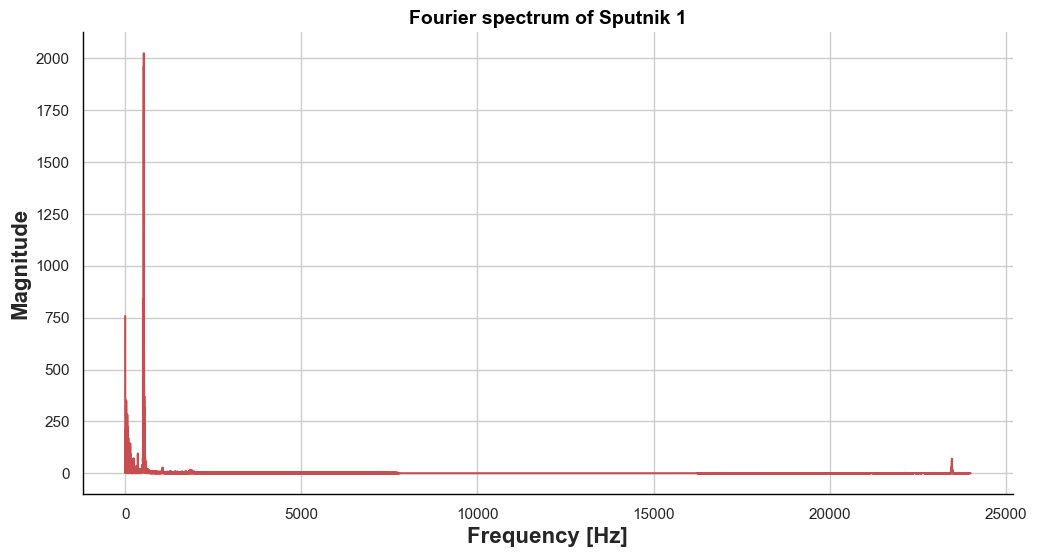

In [12]:
# Fourier Spectrum of signal x1 using SciPy

FFT_x1 = rfft(x1)                                      # FFT of real input signal
Freq_x1 = rfftfreq(len(x1), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x1 =  np.abs(FFT_x1)/(0.5*len(x1))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x1, FFT_normalized_x1, 'r') 
plt.title('Fourier spectrum of Sputnik 1', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=16, fontweight='bold')
plt.ylabel('Magnitude', fontsize=16, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("FD01_Sputnik.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

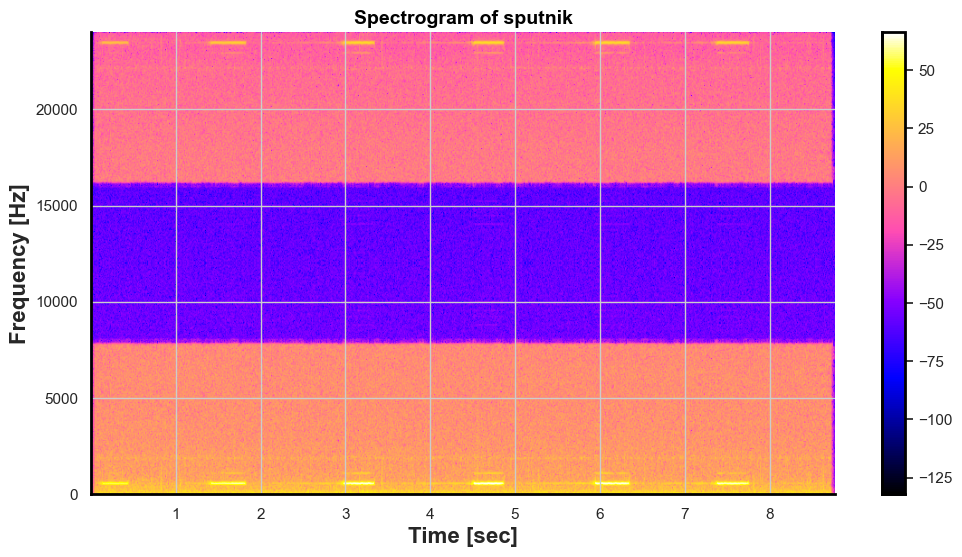

In [13]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x1, Fs = fs, NFFT = 1024, noverlap = 512, cmap= 'gnuplot2')

plt.title('Spectrogram of sputnik', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=16, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=16, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)



## Saving the image
resolution_value = 600
plt.savefig("Sputnik_Spectrogram.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

### Hilbert Spectral Analysis using Hilbert Huang Transform

In [14]:
# Doing Empirical mode decomposition of signals x1 and x2

t = np.arange(N) / float(fs)                  # Time vector
#imf = emd.sift.sift(x)
imf_x1 = emd.sift.mask_sift(x1, max_imfs=6)   # Intrinsic mode functions of signal x1


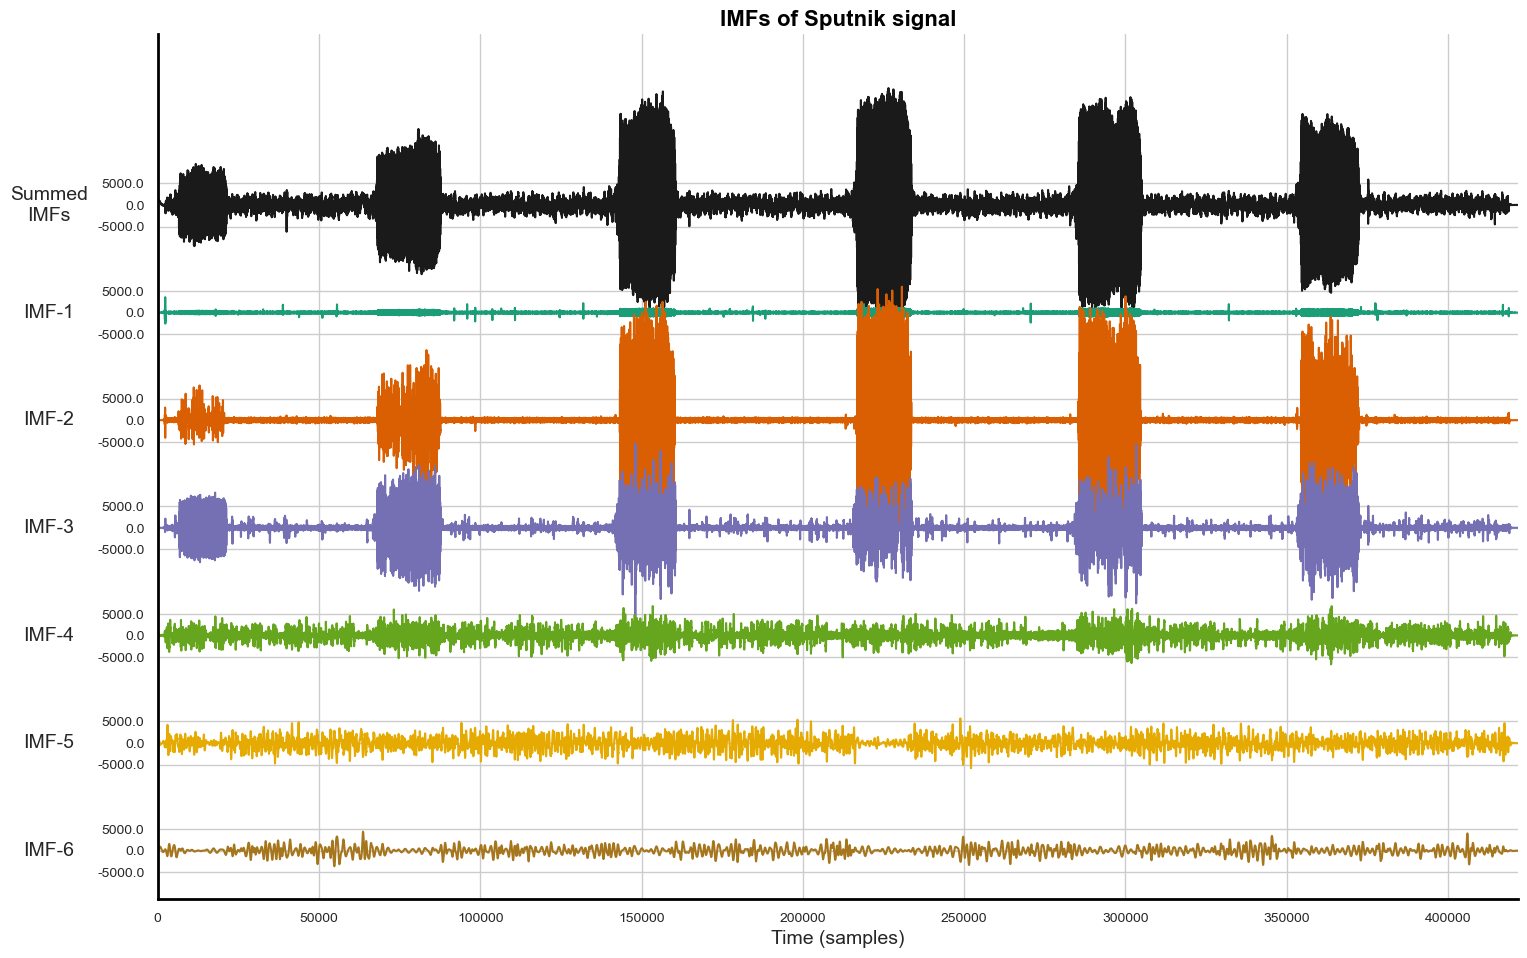

In [15]:
#Visualising the resulting IMFs of signal x1

emd.plotting.plot_imfs(imf_x1)
plt.title('IMFs of Sputnik signal', fontsize=16, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 8)

## Saving the image
resolution_value = 600
plt.savefig("Sputnik IMFs.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)

In [16]:
#Computing instantaneous phase, instantaneous frequency and amplitude.

IP_x1, IF_x1, IA_x1 = emd.spectra.frequency_transform(imf_x1, fs, 'hilbert')

Text(0, 0.5, 'Frequency [Hz]')

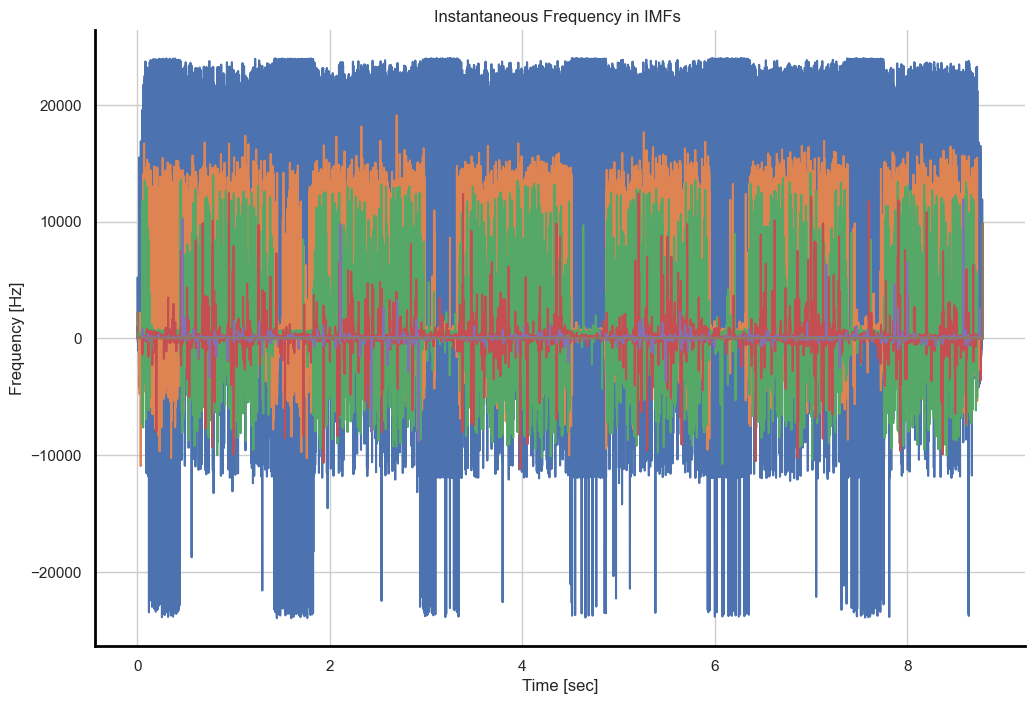

In [17]:
# Plotting instantaneous frequency for signal 1

plt.plot(t, IF_x1)
plt.title('Instantaneous Frequency in IMFs ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Power')

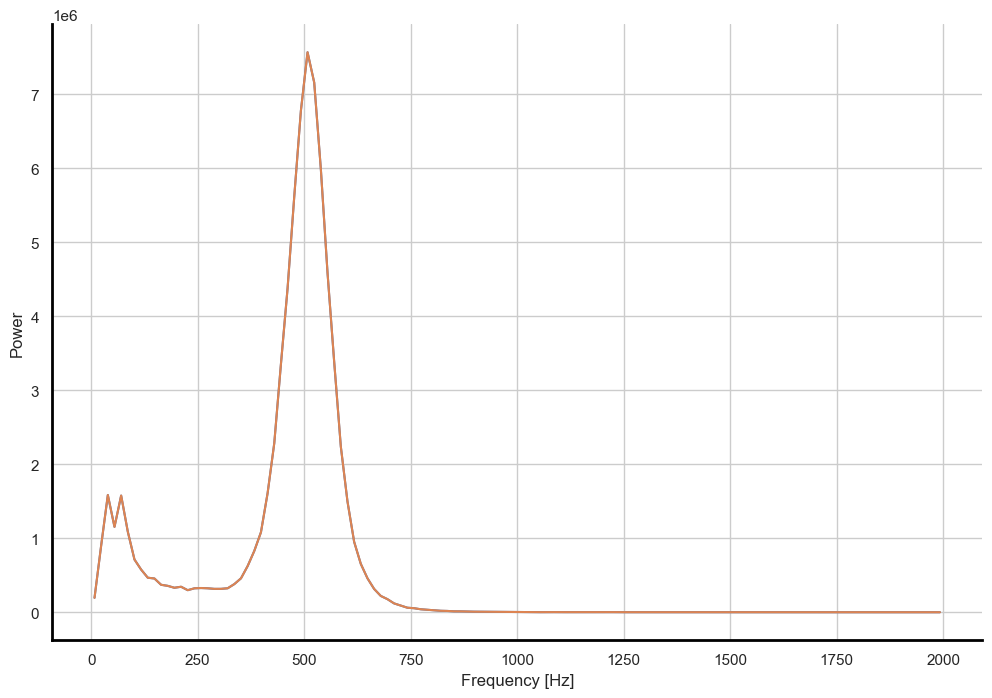

In [18]:
# Applying HHT to IMFs of x1

f_range = (0, 2000, 128)
hht_x1, spec = emd.spectra.hilberthuang(IF_x1, IA_x1, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power') 